<a href="https://colab.research.google.com/github/GabrielEdreira/Tareas_PRIA/blob/main/RNA_GabrielAntonioEdreiraGarcia/RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

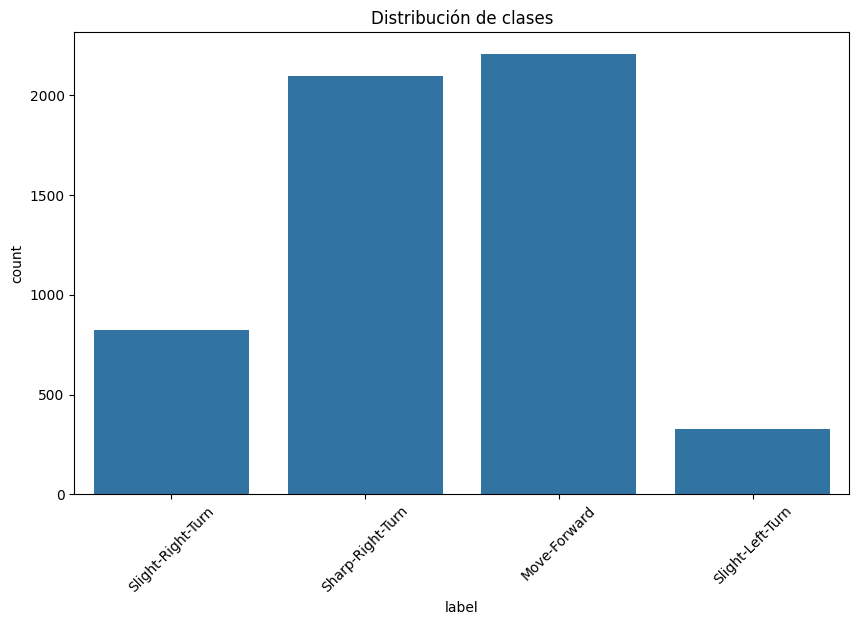

Accuracy: 0.9053145998778253

Classification Report:
                    precision    recall  f1-score   support

     Move-Forward       0.88      0.92      0.90       671
 Sharp-Right-Turn       0.94      0.92      0.93       620
 Slight-Left-Turn       0.92      0.87      0.89        92
Slight-Right-Turn       0.88      0.83      0.86       254

         accuracy                           0.91      1637
        macro avg       0.91      0.89      0.90      1637
     weighted avg       0.91      0.91      0.91      1637



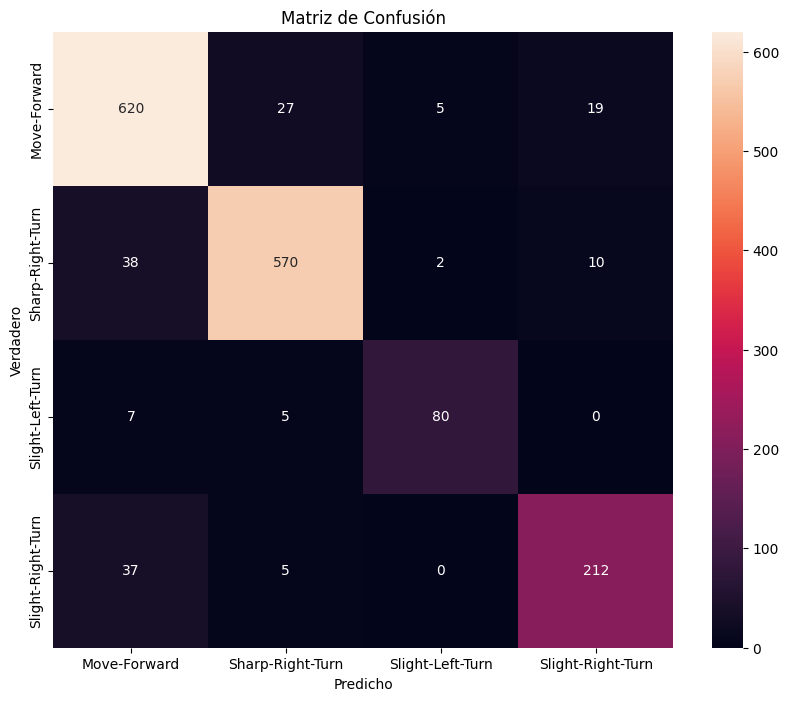

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Cargar los datos
df = pd.read_csv('sensor_readings_24.csv', header=None)
df.columns = ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9',
              's10', 's11', 's12', 's13', 's14', 's15', 's16',
              's17', 's18', 's19', 's20', 's21', 's22', 's23', 's24', 'label']

# Visualizar la distribución de clases
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label')
plt.title('Distribución de clases')
plt.xticks(rotation=45)
plt.show()

# Preprocesamiento
X = df.drop('label', axis=1)
y = df['label']

# Codificar las etiquetas
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu',
                    solver='adam', random_state=42, early_stopping=True)

mlp.fit(X_train_scaled, y_train)

# Evaluación
y_pred = mlp.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Matriz de confusión
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.show()

In [ ]:
import os
import librosa
import resampy
import numpy as np
import librosa.display
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Función para extraer características MFCC
def extract_features(file_path):
    try:
        audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_processed = np.mean(mfccs.T, axis=0)
    except Exception as e:
        print("Error al procesar el archivo:", file_path, str(e))
        return None
    return mfccs_processed

# Cargar datos (asumiendo una estructura de directorios específica)
features = []
labels = []

# Ejemplo de estructura: dataset/0/archivo1.wav, dataset/1/archivo2.wav, etc.
for digit in range(10):
    digit_path = f'dataset\{digit}'
    for filename in os.listdir(digit_path):
        if filename.endswith('.opus'):
            file_path = os.path.join(digit_path, filename)
            data = extract_features(file_path)
            if data is not None:
                features.append(data)
                labels.append(digit)

# Convertir a arrays numpy
X = np.array(features)
y = np.array(labels)

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el MLP
mlp_audio = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=500,
                         activation='relu', solver='adam',
                         early_stopping=True, random_state=42)

mlp_audio.fit(X_train_scaled, y_train)

# Evaluación
y_pred = mlp_audio.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualizar una forma de onda y MFCCs
plt.figure(figsize=(12, 6))

# Ejemplo: primera muestra del dataset
audio_path = f'dataset/{y[0]}/{os.listdir(f"dataset/{y[0]}")[0]}'
audio, sr = librosa.load(audio_path)

plt.subplot(1, 2, 1)
librosa.display.waveshow(audio, sr=sr)
plt.title('Forma de onda del audio')

plt.subplot(1, 2, 2)
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.tight_layout()
plt.show()


Dataset cargado: 27254 muestras, 40 características por muestra

Entrenando modelo MLP...
Iteration 1, loss = 1.73036733
Validation score: 0.446126
Iteration 2, loss = 1.45208110
Validation score: 0.474094
Iteration 3, loss = 1.33406445
Validation score: 0.516735
Iteration 4, loss = 1.24274569
Validation score: 0.529574
Iteration 5, loss = 1.16436548
Validation score: 0.543329
Iteration 6, loss = 1.09098347
Validation score: 0.560293
Iteration 7, loss = 1.02766505
Validation score: 0.554791
Iteration 8, loss = 0.96847422
Validation score: 0.563961
Iteration 9, loss = 0.91231648
Validation score: 0.579092
Iteration 10, loss = 0.86007748
Validation score: 0.565796
Iteration 11, loss = 0.81173739
Validation score: 0.567630
Iteration 12, loss = 0.76852051
Validation score: 0.575424
Iteration 13, loss = 0.72339661
Validation score: 0.577258
Iteration 14, loss = 0.68249346
Validation score: 0.573590
Iteration 15, loss = 0.64652653
Validation score: 0.582760
Iteration 16, loss = 0.61167748
V

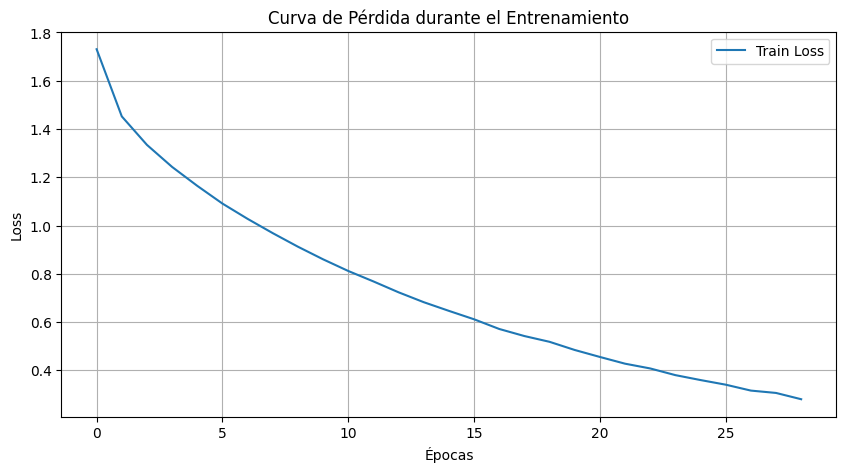

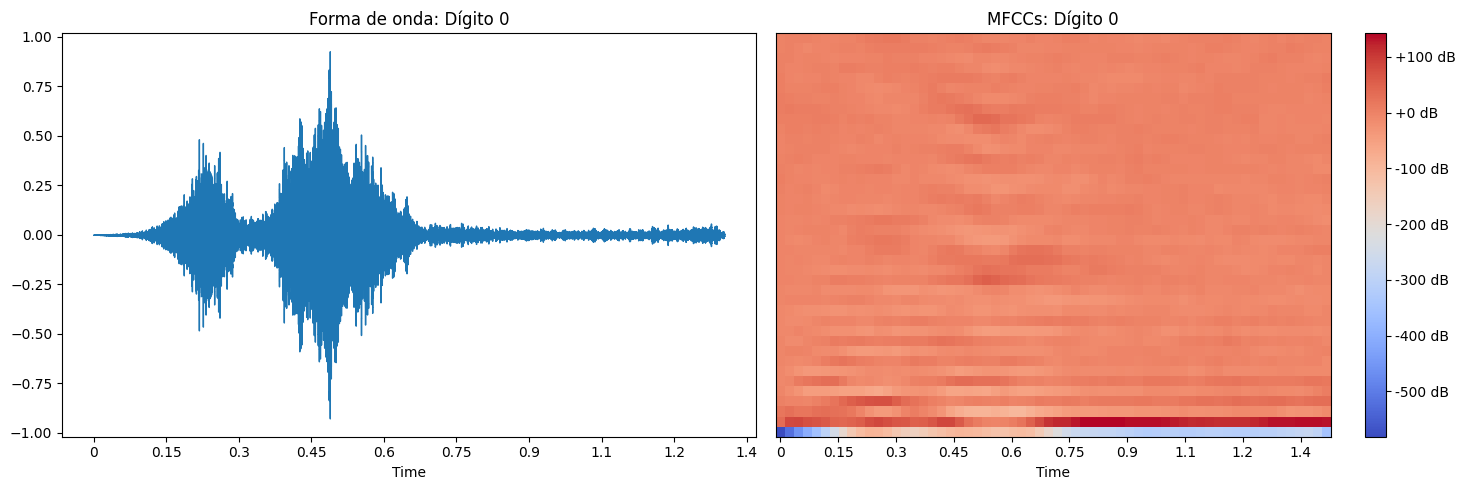

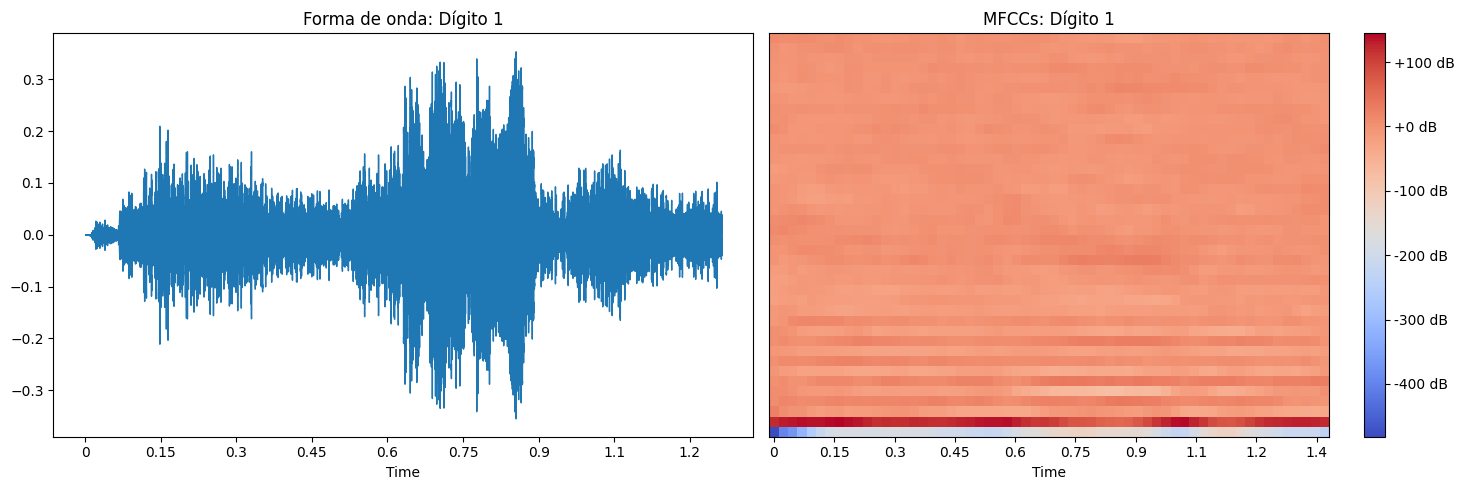

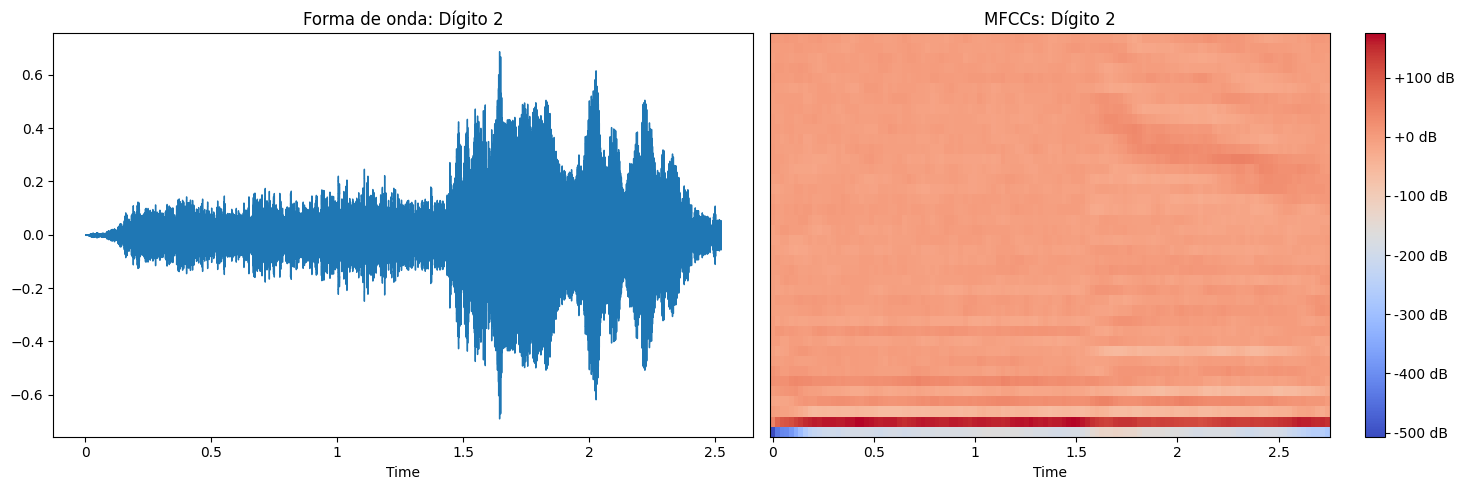

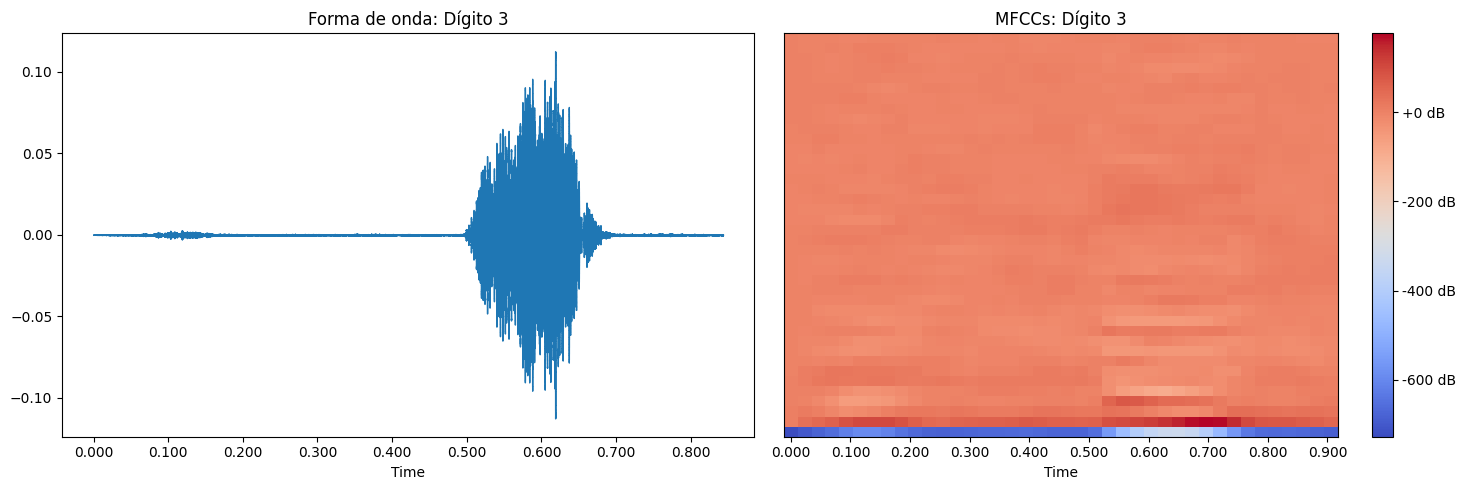

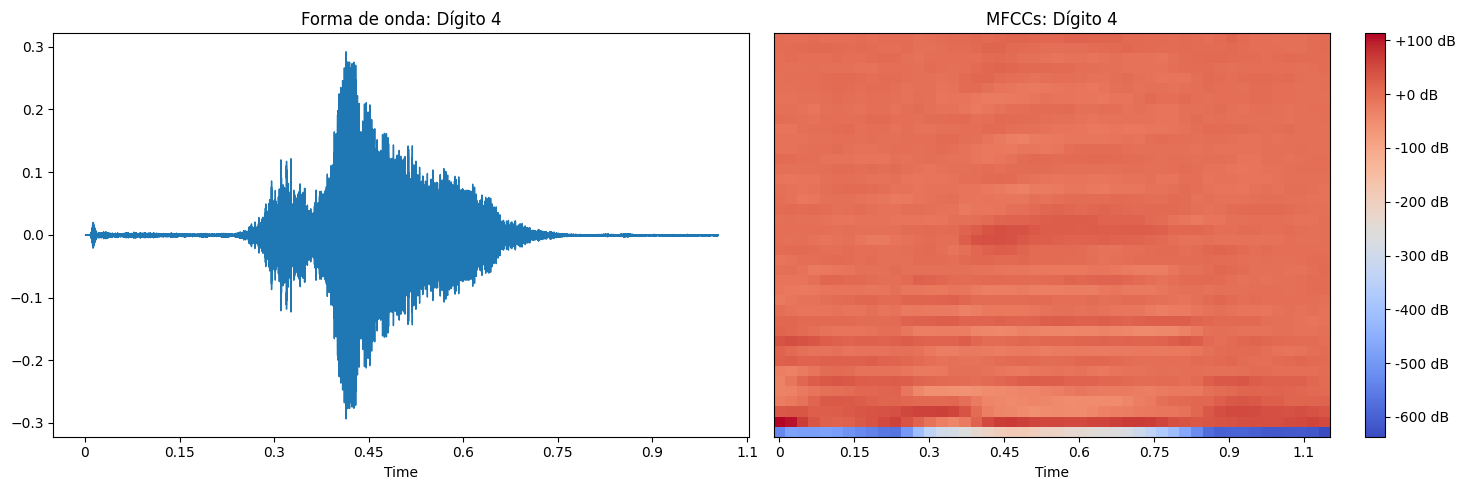

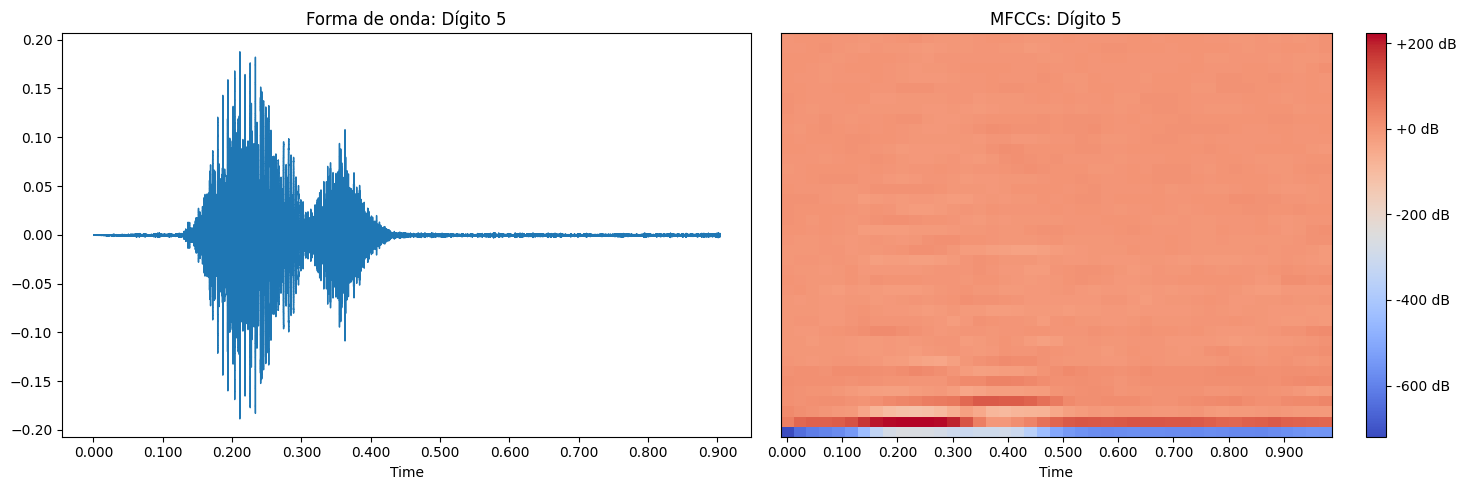

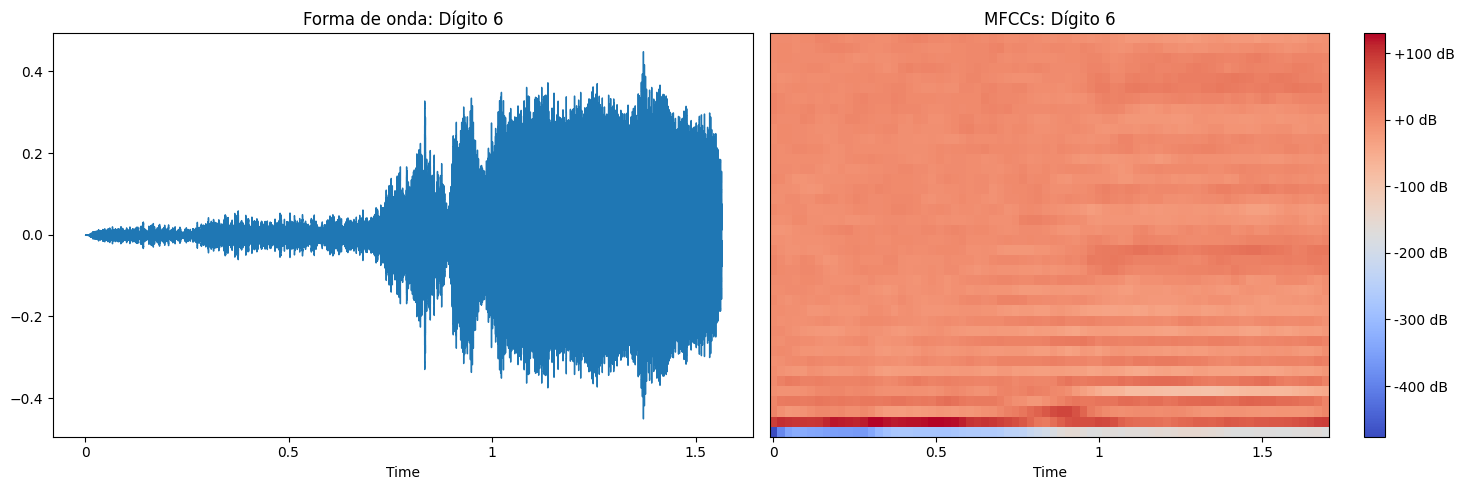

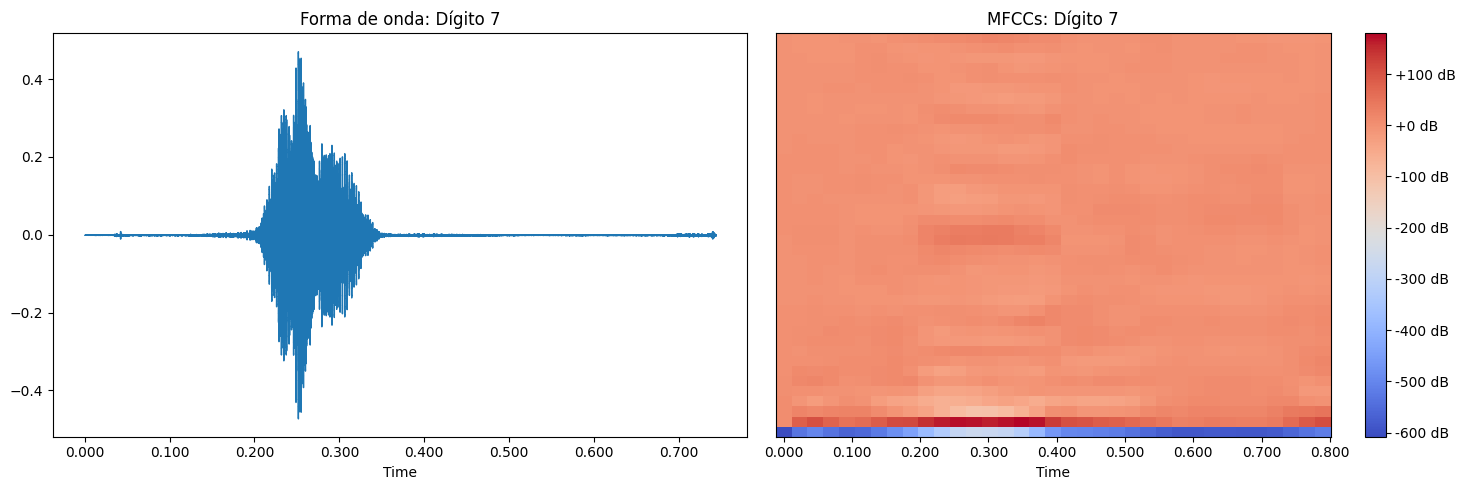

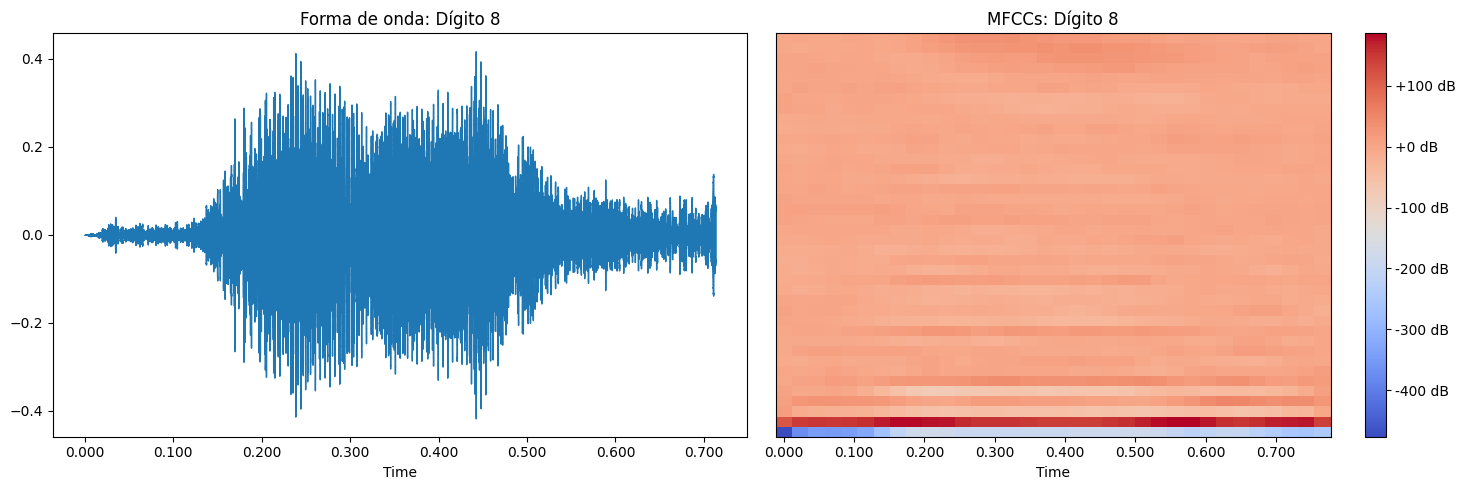

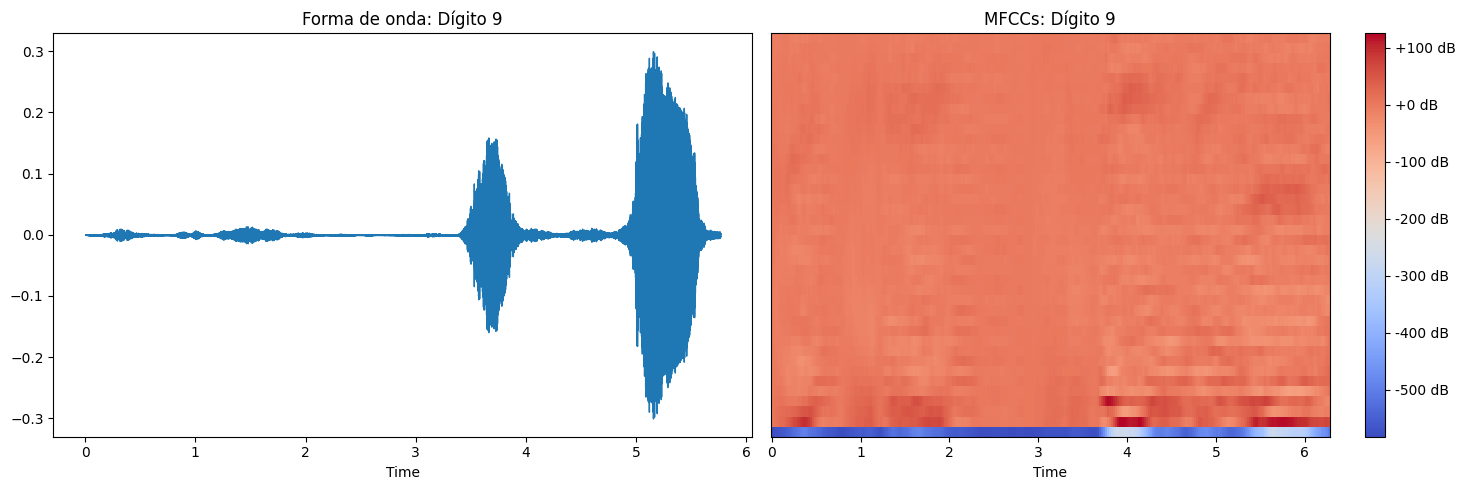

'\nPara mejorar el modelo:\n1. Aumentar el tamaño del dataset con técnicas de data augmentation (cambiar tono, velocidad, añadir ruido)\n2. Probar arquitecturas más profundas o CNN para audio\n3. Ajustar hiperparámetros con GridSearchCV\n4. Usar más características acústicas (spectral centroid, zero-crossing rate, etc.)\n'

In [7]:
# ============= CLASIFICACIÓN DE DÍGITOS URDU EN AUDIO (ARCHIVOS .OPUS) =============

import librosa
import librosa.display
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# ------------------------ CONFIGURACIÓN INICIAL ------------------------
# Asegúrate de tener instalado ffmpeg: sudo apt-get install ffmpeg (Linux) o brew install ffmpeg (Mac)
# Instala dependencias: pip install librosa scikit-learn matplotlib numpy

# ------------------------ FUNCIÓN PARA EXTRAER CARACTERÍSTICAS ------------------------
def extract_features(file_path):
    try:
        # Cargar audio con frecuencia de muestreo original (sr=None)
        audio, sample_rate = librosa.load(file_path, sr=None, duration=2.0)  # Limitamos a 2 segundos si varía la duración
        
        # Extraer 40 coeficientes MFCC
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        
        # Procesar: tomar la media por coeficiente a través del tiempo
        mfccs_processed = np.mean(mfccs.T, axis=0)
        
    except Exception as e:
        print(f"Error procesando {file_path}: {str(e)}")
        return None
    
    return mfccs_processed

# ------------------------ CARGA DE DATOS .OPUS ------------------------
def load_dataset(dataset_path):
    features = []
    labels = []
    
    # Asumiendo estructura: dataset/0/audio1.opus, dataset/1/audio2.opus, etc.
    for digit in range(10):  # Dígitos del 0 al 9
        digit_dir = os.path.join(dataset_path, str(digit))
        
        if not os.path.exists(digit_dir):
            print(f"¡Advertencia! Directorio no encontrado: {digit_dir}")
            continue
            
        for filename in os.listdir(digit_dir):
            if filename.endswith('.opus'):
                file_path = os.path.join(digit_dir, filename)
                
                # Extraer características MFCC
                mfcc_features = extract_features(file_path)
                
                if mfcc_features is not None:
                    features.append(mfcc_features)
                    labels.append(digit)
    
    return np.array(features), np.array(labels)

# ------------------------ PREPARACIÓN DEL DATASET ------------------------
# Cambia esta ruta a la ubicación de tu dataset
dataset_path = "./dataset"  # Ejemplo: "urdu_audio_digits"

X, y = load_dataset(dataset_path)

# Verificar que tenemos datos
if len(X) == 0:
    raise ValueError("No se encontraron archivos .opus en la ruta especificada.")

print(f"\nDataset cargado: {X.shape[0]} muestras, {X.shape[1]} características por muestra")

# ------------------------ DIVISIÓN EN TRAIN/TEST ------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Mantiene proporción de clases
)

# Escalado de características (importante para MLP)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------ ENTRENAMIENTO DEL MLP ------------------------
mlp = MLPClassifier(
    hidden_layer_sizes=(256, 128),  # Dos capas ocultas
    activation='relu',
    solver='adam',
    batch_size=32,
    learning_rate_init=0.001,
    max_iter=500,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=42,
    verbose=True  # Muestra progreso durante entrenamiento
)

print("\nEntrenando modelo MLP...")
mlp.fit(X_train_scaled, y_train)

# ------------------------ EVALUACIÓN ------------------------
y_pred = mlp.predict(X_test_scaled)

print("\nResultados de clasificación:")
print(classification_report(y_test, y_pred))
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred):.4f}")

# ------------------------ VISUALIZACIONES ------------------------
# 1. Gráfico de pérdida durante el entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(mlp.loss_curve_, label='Train Loss')
plt.title("Curva de Pérdida durante el Entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# 2. Mostrar un audio de ejemplo y sus MFCCs
def plot_audio_example(digit=0):
    """Muestra la forma de onda y MFCCs de un audio del dígito especificado"""
    digit_dir = os.path.join(dataset_path, str(digit))
    opus_files = [f for f in os.listdir(digit_dir) if f.endswith('.opus')]
    
    if not opus_files:
        print(f"No hay archivos .opus para el dígito {digit}")
        return
    
    file_path = os.path.join(digit_dir, opus_files[0])
    audio, sr = librosa.load(file_path, sr=None)
    
    plt.figure(figsize=(15, 5))
    
    # Forma de onda
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(audio, sr=sr)
    plt.title(f"Forma de onda: Dígito {digit}")
    
    # MFCCs
    plt.subplot(1, 2, 2)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"MFCCs: Dígito {digit}")
    
    plt.tight_layout()
    plt.show()

# Ejemplo: visualizar el dígito 0
plot_audio_example(digit=0)
plot_audio_example(digit=1)
plot_audio_example(digit=2)
plot_audio_example(digit=3)
plot_audio_example(digit=4)
plot_audio_example(digit=5)
plot_audio_example(digit=6)
plot_audio_example(digit=7)
plot_audio_example(digit=8)
plot_audio_example(digit=9)

# ------------------------ GUARDAR MODELO (OPCIONAL) ------------------------
# from joblib import dump
# dump({'model': mlp, 'scaler': scaler}, 'mlp_urdu_digits.joblib')

# ------------------------ NOTAS FINALES ------------------------
"""
Para mejorar el modelo:
1. Aumentar el tamaño del dataset con técnicas de data augmentation (cambiar tono, velocidad, añadir ruido)
2. Probar arquitecturas más profundas o CNN para audio
3. Ajustar hiperparámetros con GridSearchCV
4. Usar más características acústicas (spectral centroid, zero-crossing rate, etc.)
"""